In [41]:
import pandas as pd 
import numpy as np

from rdkit import Chem
from mapchiral import mapchiral
import tmap as tm

from matplotlib.colors import ListedColormap, LogNorm, LinearSegmentedColormap
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = "Menlo"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams.update({'font.size': 22})

Read data

In [3]:
df = pd.read_csv('tmap_data/merged.csv')

Add MAP4C

In [5]:
df['map4c'] = df['sequence'].apply(lambda x: mapchiral.encode(Chem.MolFromSequence(x), max_radius=2, n_permutations=2048))

Calculate TMAP layout

In [66]:
lf = tm.LSHForest(512, 32)

map4 = np.array(df['map4c'])
fps = []

for i in map4:
    vec = tm.VectorUint(i)
    fps.append(vec)

lf.batch_add(fps)
lf.index()

cfg = tm.LayoutConfiguration() #configuration parameters for tmap layout
cfg.node_size = 1/32.5 #size of nodes which affects the magnitude of their repelling force. Decreasing this values generally resolves overlaps in a very crowded tree
cfg.mmm_repeats = 2 #number of repeats of the per-level layout algorithm
cfg.sl_extra_scaling_steps = 5 #sets the number of repeats of the scaling
cfg.k = 15 #number of nearest neighbours used to create the k-nearest neighbour graph
cfg.sl_scaling_type = tm.RelativeToAvgLength #Defines the relative scale of the graph
x, y, s, t, _ = tm.layout_from_lsh_forest(lf, cfg)

Plot

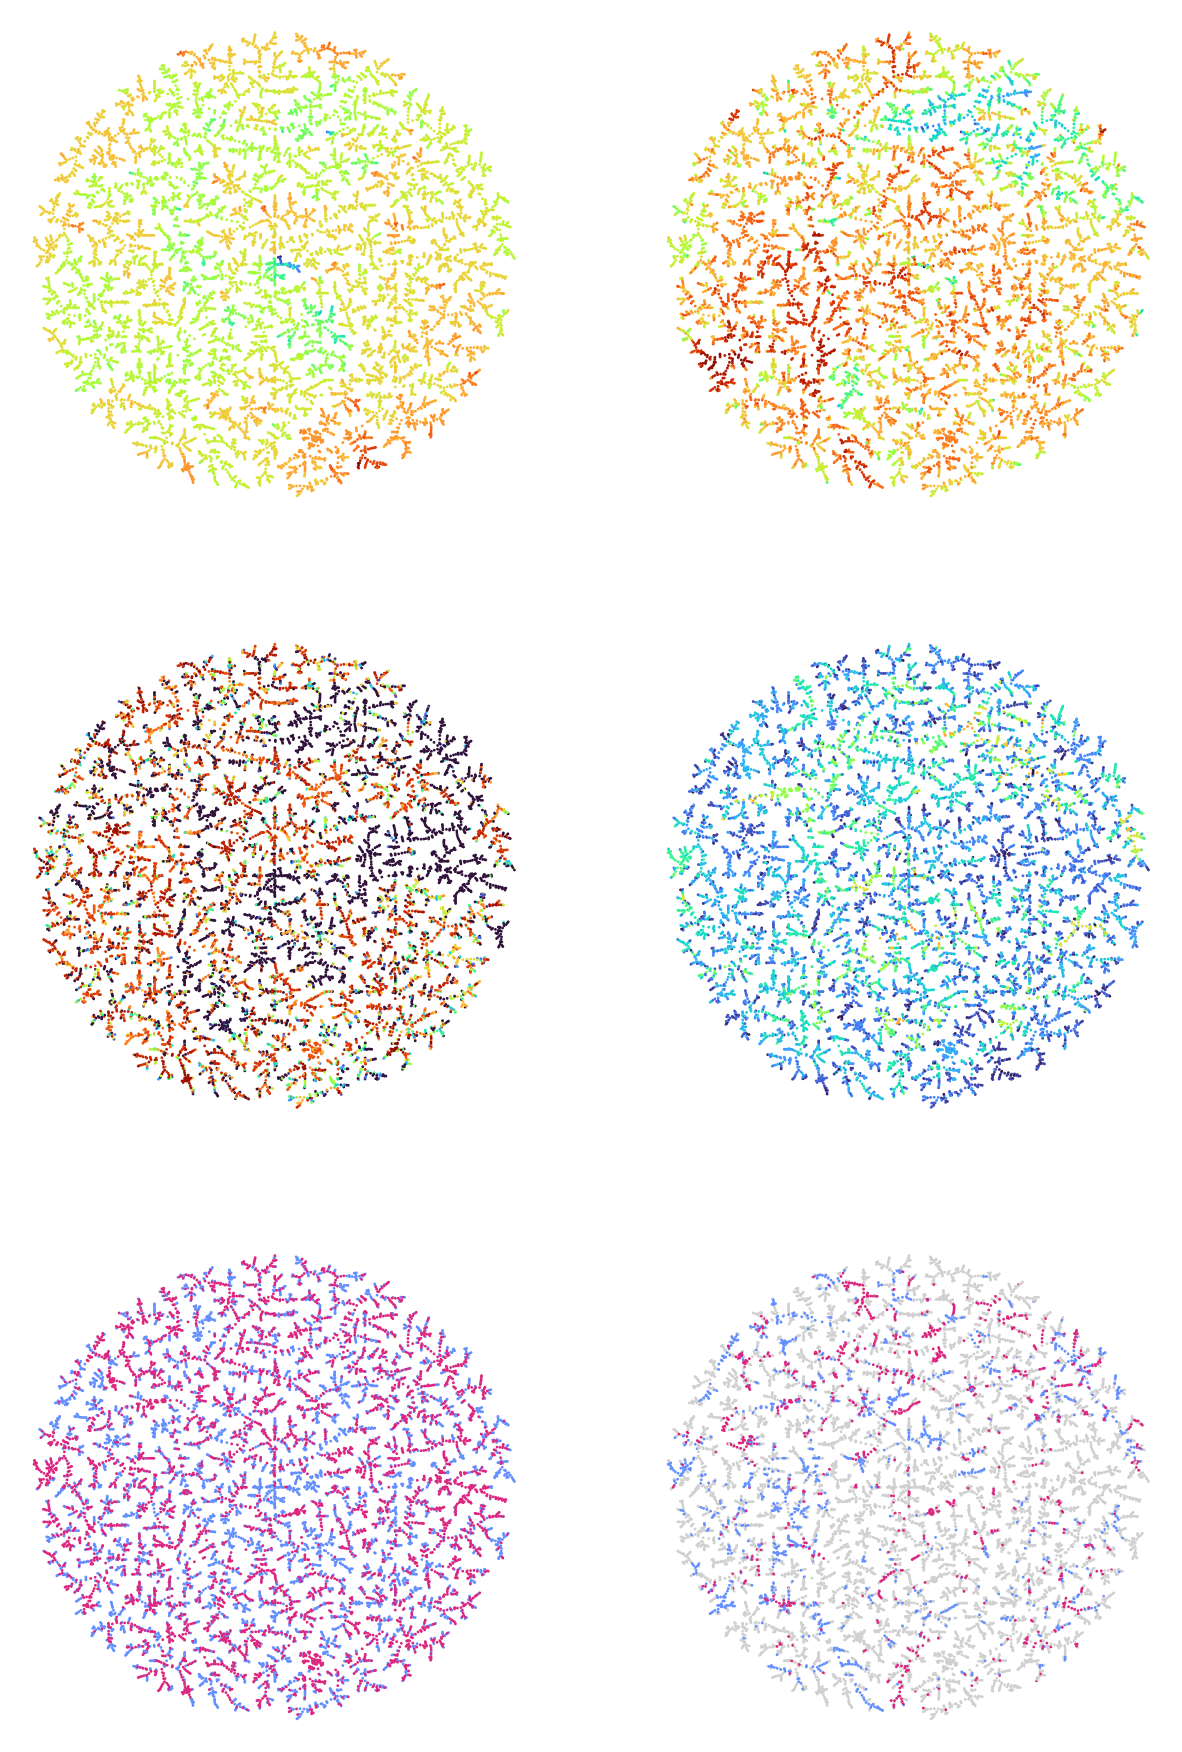

In [67]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 22.5))

cmap2 = ListedColormap(['#648FFF', '#DC267F'])
cmap3 = ListedColormap(['#D0D0D0', '#648FFF', '#DC267F'])

scatter1 = ax1.scatter(x, y, c=df['hac'], cmap='turbo', s=1, norm=LogNorm())
scatter2 = ax2.scatter(x, y, c=df['frac_c'], cmap='turbo', s=1)
scatter3 = ax3.scatter(x, y, c=df['helicity'], cmap='turbo', s=1)
scatter4 = ax4.scatter(x, y, c=df['hydrophobic_moment'], cmap='turbo', s=1)
scatter5 = ax5.scatter(x, y, c=df['activity'], cmap=cmap2, s=1)
scatter6 = ax6.scatter(x, y, c=df['hemolysis'], cmap=cmap3, s=1)

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

plt.savefig('figures/TMAPs.png', dpi=1200, bbox_inches='tight')